In [284]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


from itertools import combinations
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import make_scorer, mean_squared_log_error
from sklearn import metrics

import warnings
warnings.simplefilter(action='ignore')

In [285]:
df = pd.read_csv("train.csv",  parse_dates=True)
print(df.shape)
df.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [286]:
df['datetime']=pd.to_datetime(df['datetime'])
df['datetime']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [287]:

df['year']=df['datetime'].dt.year
df['month']=df['datetime'].dt.month
df['weekday']=df['datetime'].dt.weekday
df['hour']=df['datetime'].dt.hour
#df=df.drop(['casual','registered'],axis=1)
df=df.set_index('datetime')
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,weekday,hour
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,5,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,5,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,5,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,5,4


In [288]:
df['year'] = df['year'].map({2011:0, 2012:1})

In [289]:
df['season']=df['season'].astype('category')
df['weather']=df['weather'].astype('category')
df['weekday']=df['weekday'].astype('category')
df['month']=df['month'].astype('category')


***EDA***

In [2271]:
import plotly.express as px
fig=px.line(df, y='count')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

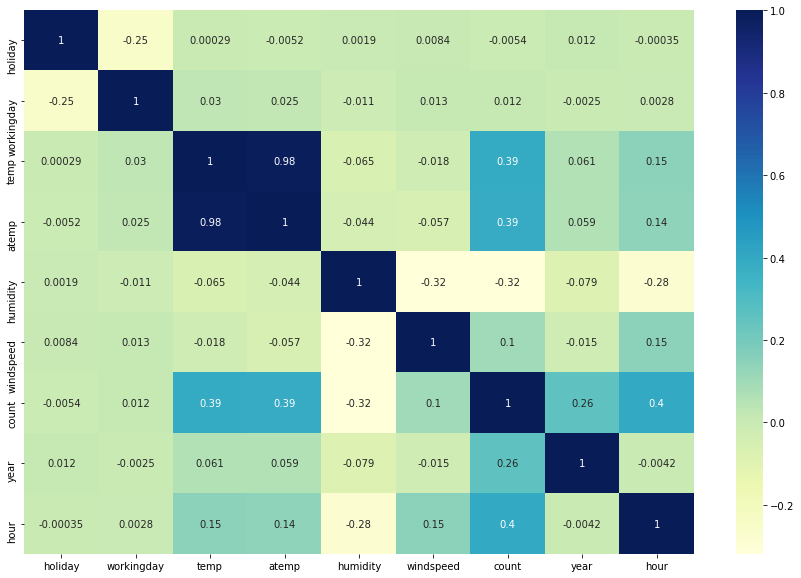

In [2171]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True, cmap='YlGnBu')
plt.show()

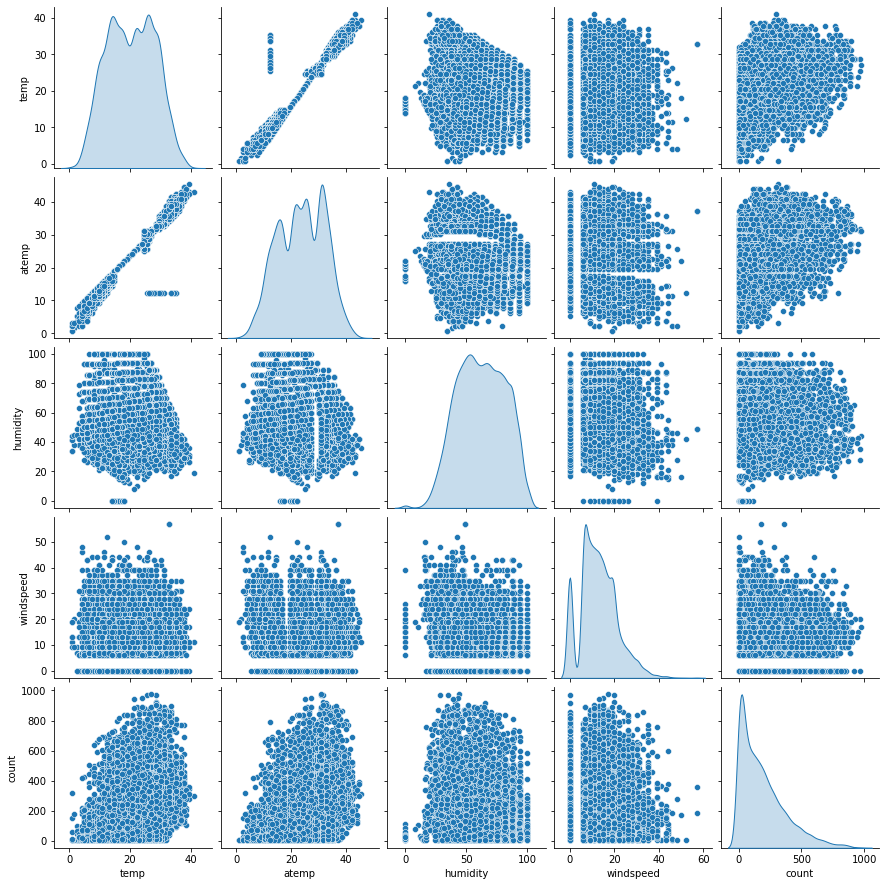

In [2224]:
#look at numerical features (correlation)
num=df[[ 'temp', 'atemp', 'humidity', 'windspeed', 'count']]

sns.pairplot(num, diag_kind='kde')
plt.show()

<AxesSubplot:xlabel='humidity', ylabel='count'>

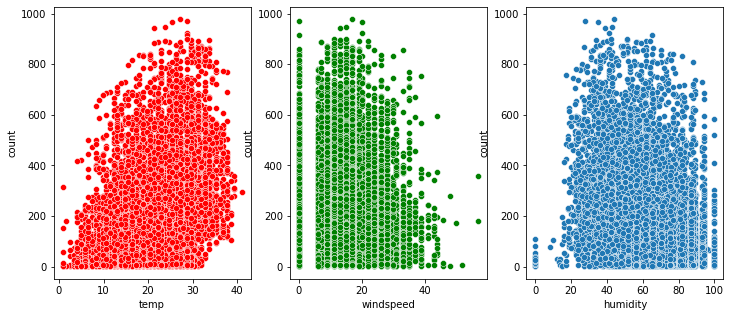

In [10]:
#closer look at main numerical features
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sns.scatterplot(x="temp", y="count", data=df,ax=ax1,color='r')
sns.scatterplot(x="windspeed", y="count", data=df,ax=ax2, color='g')
sns.scatterplot(x="humidity", y="count", data=df,ax=ax3)

<AxesSubplot:>

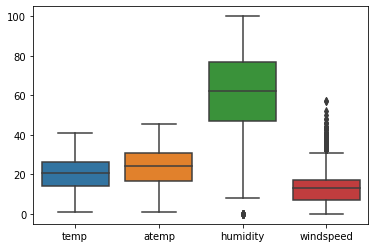

In [2201]:
sns.boxplot(data=df[['temp',
       'atemp', 'humidity', 'windspeed']])

<AxesSubplot:xlabel='hour', ylabel='count'>

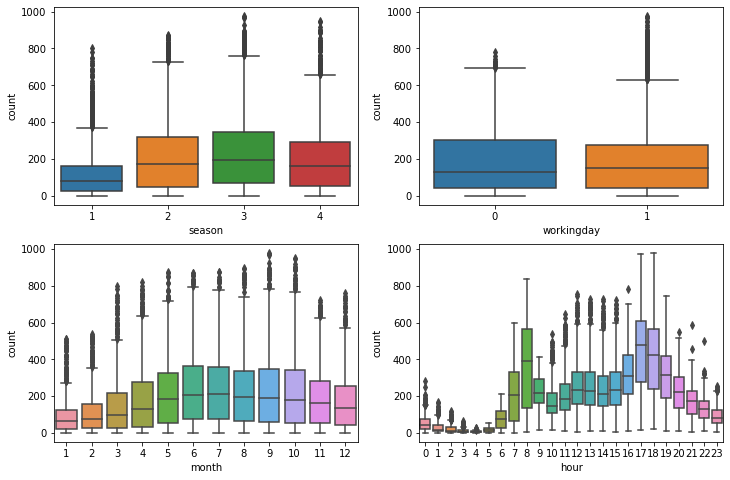

In [294]:
#look at categirocal features
fig,axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 8)
sns.boxplot('season','count', data=df,ax=axes[0][0])
sns.boxplot('workingday','count', data=df,ax=axes[0][1])
sns.boxplot('month','count', data=df,ax=axes[1][0])
sns.boxplot('hour','count', data=df, ax=axes[1][1])

<AxesSubplot:xlabel='hour', ylabel='count'>

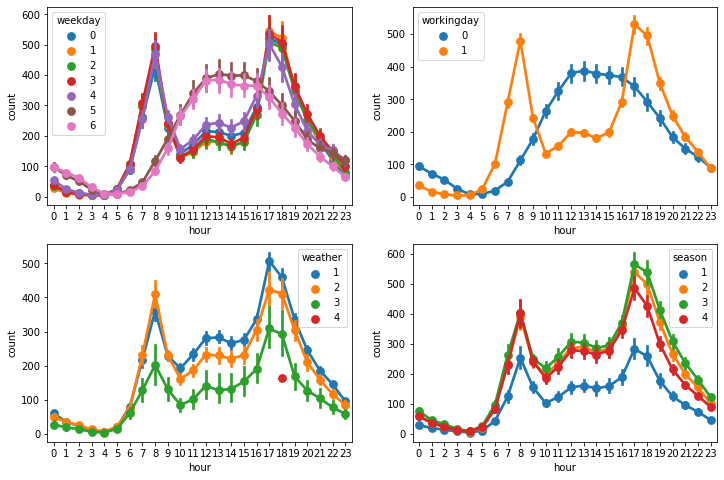

In [108]:

fig,axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 8)
sns.pointplot('hour', 'count', data=df, hue='weekday', ax=axes[0][0])
sns.pointplot('hour', 'count', data=df, hue='workingday', ax=axes[0][1])
sns.pointplot('hour', 'count', data=df, hue='weather', ax=axes[1][0])
sns.pointplot('hour', 'count', data=df, hue='season', ax=axes[1][1])

<AxesSubplot:xlabel='season', ylabel='value'>

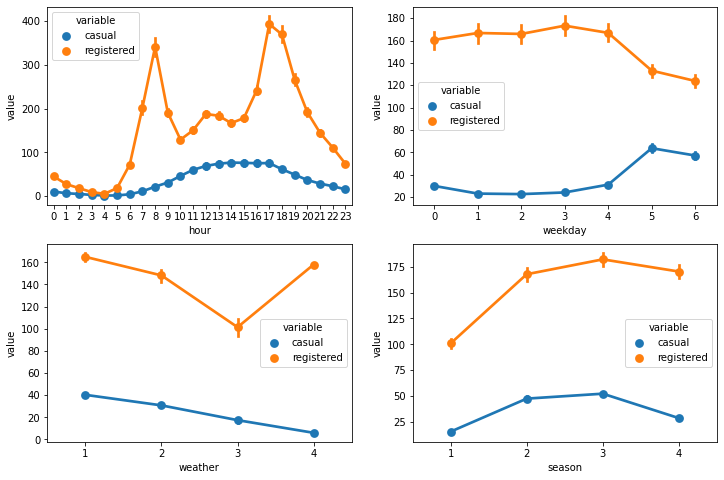

In [296]:
#difference btw registered and casual riders
regcas = pd.melt(df[["hour","casual","registered",'weekday','weather','season']], id_vars=['weather','hour','weekday','season'], value_vars=['casual', 'registered'])

fig,ax=plt.subplots(2,2)
fig.set_size_inches(12, 8)
sns.pointplot('hour', 'value', hue='variable', data=regcas, ax=ax[0][0])
sns.pointplot('weekday', 'value', hue='variable', data=regcas, ax=ax[0][1])
sns.pointplot('weather', 'value', hue='variable',data=regcas, ax=ax[1][0])
sns.pointplot('season', 'value', hue='variable', data=regcas, ax=ax[1][1])

<AxesSubplot:xlabel='count', ylabel='Density'>

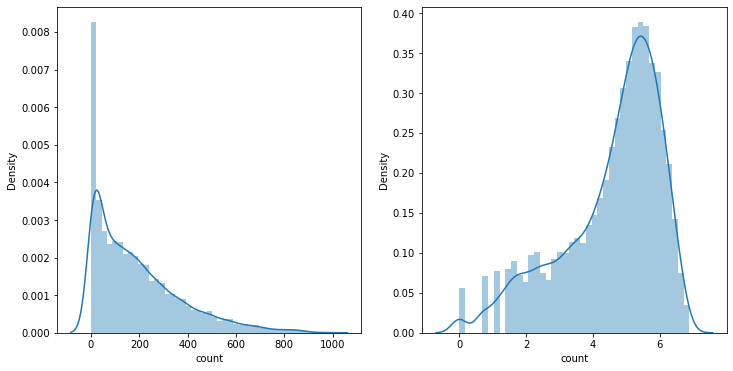

In [297]:
#using log(y) for normal distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
sns.distplot(df["count"],ax=ax1)
sns.distplot(np.log(df["count"]),ax=ax2)

## Manual feature engineering

In [298]:
df2=df.copy()

df=pd.get_dummies(df, columns=['season','weather', 'hour'], drop_first=True)

In [242]:
num=['temp', 'humidity', 'windspeed']
scaler=MinMaxScaler()
df[num]=scaler.fit_transform(df[num])

In [244]:
X=df.drop(['count','atemp','holiday', 'casual','registered'], axis=1)
y=df['count']
ylog = np.log1p(y)

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X, ylog, random_state=42)

***Linear Regression***

In [246]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [247]:
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)


In [248]:
print('r_2 score train :',r2_score(y_train,y_pred_train))
print('r_2 score test :',r2_score(y_test,y_pred_test))

print("train msle :", np.sqrt(mean_squared_log_error((np.exp(y_train)-1), (np.exp(y_pred_train)-1))))
print("test msle  :", np.sqrt(mean_squared_log_error((np.exp(y_test)-1), (np.exp(y_pred_test)-1))))


r_2 score train : 0.8303512746567935
r_2 score test : 0.8324440421426547
train msle : 0.5853000693182514
test msle  : 0.578964119852239


***Using combinations from intertools to explore combinations of features***

In [80]:
column_list=X_train.columns
interactions=list(combinations(column_list,2))
interactions

[('workingday', 'temp'),
 ('workingday', 'humidity'),
 ('workingday', 'windspeed'),
 ('workingday', 'year'),
 ('workingday', 'month'),
 ('workingday', 'weekday'),
 ('workingday', 'season_2'),
 ('workingday', 'season_3'),
 ('workingday', 'season_4'),
 ('workingday', 'weather_2'),
 ('workingday', 'weather_3'),
 ('workingday', 'weather_4'),
 ('workingday', 'hour_1'),
 ('workingday', 'hour_2'),
 ('workingday', 'hour_3'),
 ('workingday', 'hour_4'),
 ('workingday', 'hour_5'),
 ('workingday', 'hour_6'),
 ('workingday', 'hour_7'),
 ('workingday', 'hour_8'),
 ('workingday', 'hour_9'),
 ('workingday', 'hour_10'),
 ('workingday', 'hour_11'),
 ('workingday', 'hour_12'),
 ('workingday', 'hour_13'),
 ('workingday', 'hour_14'),
 ('workingday', 'hour_15'),
 ('workingday', 'hour_16'),
 ('workingday', 'hour_17'),
 ('workingday', 'hour_18'),
 ('workingday', 'hour_19'),
 ('workingday', 'hour_20'),
 ('workingday', 'hour_21'),
 ('workingday', 'hour_22'),
 ('workingday', 'hour_23'),
 ('temp', 'humidity'),
 (

In [81]:
interactions_dict = {}
for interaction in interactions:
    X_train_int = X_train
    X_train_int['int'] = X_train_int[interaction[0]].astype(float) * X_train_int[interaction[1]].astype(float)
    lr = LinearRegression()
    lr.fit(X_train_int, y_train)
    interactions_dict[lr.score(X_train_int, y_train)] = interaction

In [82]:
top_5 = sorted(interactions_dict.keys(), reverse = True)[:10]
for interaction in top_5:
    print(interactions_dict[interaction])

('workingday', 'hour_7')
('workingday', 'hour_6')
('workingday', 'hour_2')
('workingday', 'hour_8')
('weekday', 'hour_7')
('weekday', 'hour_2')
('weekday', 'hour_6')
('workingday', 'hour_3')
('workingday', 'hour_1')
('weekday', 'hour_8')


In [75]:
def rmslr(y_true, y_pred, **kwargs):
   return mean_squared_log_error(y_true, y_pred, **kwargs)**0.5

In [249]:
#RandomForestRegressor to look at the feature importances
forest_model = RandomForestRegressor()

params = {'n_estimators':[1,10,100]}

rmslr_scorer = make_scorer(rmslr, greater_is_better=False)

grid = GridSearchCV(forest_model, params, scoring = rmslr_scorer)

grid.fit(X_train,y_train)
y_pred_train=grid.predict(X_train)
y_pred_test=grid.predict(X_test)

print (grid.best_params_)
print ("RMSLE train: ", rmslr((np.exp(y_train)-1), (np.exp(y_pred_train)-1)))
print ("RMSLE test: ", rmslr((np.exp(y_test)-1), (np.exp(y_pred_test)-1)))


print('r_2 score train :',r2_score(y_train,y_pred_train))
print('r_2 score test :',r2_score(y_test,y_pred_test))

{'n_estimators': 100}
RMSLE train:  0.1606644603725555
RMSLE test:  0.41633646886975306
r_2 score train : 0.987216991161292
r_2 score test : 0.9133546054477787


In [148]:
for_model =  RandomForestRegressor(n_estimators=100)
for_model.fit(X_train, y_train)


RandomForestRegressor()

In [149]:
feature_importances=for_model.feature_importances_
feature_importances

array([4.20556357e-02, 8.57197441e-02, 5.12431849e-02, 1.79349764e-02,
       2.66461802e-02, 3.40300214e-02, 4.24985726e-02, 1.52336319e-03,
       1.33845844e-03, 3.04790180e-03, 3.10522899e-03, 5.97355237e-03,
       1.61237843e-06, 8.35784872e-02, 1.04618641e-01, 1.34891724e-01,
       1.60833200e-01, 9.67462070e-02, 1.66660072e-02, 1.08382638e-02,
       1.47308724e-02, 4.81979663e-03, 2.05128133e-03, 1.45578796e-03,
       1.27044566e-03, 1.10275990e-03, 8.90965809e-04, 9.16663374e-04,
       3.06890424e-03, 1.13762348e-02, 1.04706419e-02, 5.67424898e-03,
       3.25101838e-03, 2.43555356e-03, 2.94378925e-03, 1.02500739e-02])

In [150]:
feature_importances_df=pd.DataFrame({'features':list(X_train.columns),'feature_importances':feature_importances})
feature_importances_df.sort_values(by='feature_importances', ascending=False)

,features,feature_importances
16,hour_4,0.160833
15,hour_3,0.134892
14,hour_2,0.104619
17,hour_5,0.096746
1,temp,0.085720
13,hour_1,0.083578
2,humidity,0.051243
6,weekday,0.042499
0,workingday,0.042056
5,month,0.034030


***RFE+OLS***

In [2118]:
from sklearn.feature_selection import RFE

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)             
rfe = rfe.fit(X_train, y_train)

In [2119]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('workingday', False, 19),
 ('temp', True, 1),
 ('humidity', False, 12),
 ('windspeed', False, 13),
 ('year', False, 7),
 ('month', False, 17),
 ('weekday', False, 18),
 ('season_2', False, 10),
 ('season_3', False, 11),
 ('season_4', False, 9),
 ('weather_2', False, 16),
 ('weather_3', False, 6),
 ('weather_4', False, 15),
 ('hour_1', True, 1),
 ('hour_2', True, 1),
 ('hour_3', True, 1),
 ('hour_4', True, 1),
 ('hour_5', True, 1),
 ('hour_6', False, 14),
 ('hour_7', False, 4),
 ('hour_8', True, 1),
 ('hour_9', True, 1),
 ('hour_10', False, 2),
 ('hour_11', True, 1),
 ('hour_12', True, 1),
 ('hour_13', True, 1),
 ('hour_14', True, 1),
 ('hour_15', True, 1),
 ('hour_16', True, 1),
 ('hour_17', True, 1),
 ('hour_18', True, 1),
 ('hour_19', True, 1),
 ('hour_20', True, 1),
 ('hour_21', False, 3),
 ('hour_22', False, 5),
 ('hour_23', False, 8)]

In [2120]:
col = X_train.columns[rfe.support_]
col

Index(['temp', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_8',
       'hour_9', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15',
       'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20'],
      dtype='object')

In [2121]:
X_train_rfe = X_train[col]

In [2122]:
X_train_sm = sm.add_constant(X_train_rfe)
model = sm.OLS(y_train, X_train_sm).fit()

#print(model.params)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     1273.
Date:                Sat, 29 May 2021   Prob (F-statistic):               0.00
Time:                        00:31:37   Log-Likelihood:                -8977.6
No. Observations:                8164   AIC:                         1.799e+04
Df Residuals:                    8145   BIC:                         1.813e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6833      0.024    150.939      0.000       3.635       3.731
temp           1.8165      0.043     42.562      0.000       1.733       1.900
hour_1        -1.3949      0.042    -32.883      0.000      -1.478      -1.312
hour_2        -1.8659      0.044    -42.625      0.000      -1.952      -1.780
hour_3        -2.3601      0.042    -56.066      0.000      -2.443      -2.278
hour_4        -2.6599      0.043    -61.853      0.000      -2.744      -2.576
hour_5        -1.6741      0.043    -38.975      0.000      -1.758      -1.590
hour_8         1.0531      0.043     24.691      0.000       0.969       1.137
hour_9         0.7745      0.041     18.773      0.000       0.694       0.855
hour_11        0.5534      0.042     13.059      0.000       0.470       0.636
hour_12        0.7106      0.042     16.977      0.000       0.629       0.793
hour_13        0.7040      0.042     16.941      0.000       0.623       0.785
hour_14        0.6262      0.043     14.628      0.000       0.542       0.710
hour_15        0.6335      0.043     14.850      0.000       0.550       0.717
hour_16        0.8938      0.043     20.960      0.000       0.810       0.977
hour_17        1.3469      0.043     31.594      0.000       1.263       1.431
hour_18        1.2757      0.041     30.818      0.000       1.195       1.357
hour_19        0.9838      0.042     23.392      0.000       0.901       1.066
hour_20        0.6909      0.042     16.591      0.000       0.609       0.773
==============================================================================
Omnibus:                      478.159   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              733.317
Skew:                          -0.496   Prob(JB):                    5.78e-160
Kurtosis:                       4.083   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***OLS***

In [2123]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()

#print(model.params)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     1090.
Date:                Sat, 29 May 2021   Prob (F-statistic):               0.00
Time:                        00:32:20   Log-Likelihood:                -7244.9
No. Observations:                8164   AIC:                         1.456e+04
Df Residuals:                    8127   BIC:                         1.482e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6660      0.057     46.822      0.000       2.554       2.778
workingday     0.0237      0.020      1.188      0.235      -0.015       0.063
temp           1.3133      0.061     21.574      0.000       1.194       1.433
humidity      -0.2557      0.046     -5.531      0.000      -0.346      -0.165
windspeed     -0.2635      0.053     -4.957      0.000      -0.368      -0.159
year           0.4639      0.013     35.054      0.000       0.438       0.490
month          0.0428      0.008      5.311      0.000       0.027       0.059
weekday        0.0267      0.005      5.734      0.000       0.018       0.036
season_2       0.2701      0.034      8.042      0.000       0.204       0.336
season_3       0.0850      0.056      1.514      0.130      -0.025       0.195
season_4       0.1692      0.074      2.272      0.023       0.023       0.315
weather_2     -0.0682      0.016     -4.234      0.000      -0.100      -0.037
weather_3     -0.5330      0.027    -19.615      0.000      -0.586      -0.480
weather_4     -0.1767      0.591     -0.299      0.765      -1.335       0.981
hour_1        -0.6175      0.045    -13.721      0.000      -0.706      -0.529
hour_2        -1.1095      0.046    -24.195      0.000      -1.199      -1.020
hour_3        -1.6125      0.045    -35.971      0.000      -1.700      -1.525
hour_4        -1.8857      0.045    -41.520      0.000      -1.975      -1.797
hour_5        -0.9007      0.045    -19.841      0.000      -0.990      -0.812
hour_6         0.2729      0.045      6.123      0.000       0.186       0.360
hour_7         1.2138      0.044     27.354      0.000       1.127       1.301
hour_8         1.8386      0.045     40.696      0.000       1.750       1.927
hour_9         1.5522      0.044     34.979      0.000       1.465       1.639
hour_10        1.2226      0.045     27.045      0.000       1.134       1.311
hour_11        1.3264      0.045     29.171      0.000       1.237       1.416
hour_12        1.5076      0.045     33.181      0.000       1.418       1.597
hour_13        1.4948      0.046     32.813      0.000       1.405       1.584
hour_14        1.4120      0.047     30.365      0.000       1.321       1.503
hour_15        1.4459      0.047     31.061      0.000       1.355       1.537
hour_16        1.7060      0.046     36.753      0.000       1.615       1.797
hour_17        2.1521      0.046     46.635      0.000       2.062       2.243
hour_18        2.0649      0.045     45.643      0.000       1.976       2.154
hour_19        1.7697      0.045     39.155      0.000       1.681       1.858
hour_20        1.4676      0.045     32.772      0.000       1.380       1.555
hour_21        1.2057      0.045     26.797      0.000       1.117       1.294
hour_22        0.9629      0.045     21.406      0.000       0.875       1.051
ho

In [2124]:
#dropping values where p>0,05
X = X.drop(['workingday','season_3','weather_4'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, ylog, random_state=42)

In [2125]:
X_train_sm = sm.add_constant(X_train)
model2 = sm.OLS(y_train, X_train_sm).fit()

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     1189.
Date:                Sat, 29 May 2021   Prob (F-statistic):               0.00
Time:                        00:33:19   Log-Likelihood:                -7246.7
No. Observations:                8164   AIC:                         1.456e+04
Df Residuals:                    8130   BIC:                         1.480e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6732      0.049     54.692      0.000       2.577       2.769
temp           1.3495      0.056     24.168      0.000       1.240       1.459
humidity      -0.2602      0.046     -5.645      0.000      -0.351      -0.170
windspeed     -0.2663      0.053     -5.015      0.000      -0.370      -0.162
year           0.4627      0.013     35.004      0.000       0.437       0.489
month          0.0530      0.004     11.844      0.000       0.044       0.062
weekday        0.0228      0.003      6.960      0.000       0.016       0.029
season_2       0.2258      0.016     13.900      0.000       0.194       0.258
season_4       0.0687      0.035      1.977      0.048       0.001       0.137
weather_2     -0.0688      0.016     -4.275      0.000      -0.100      -0.037
weather_3     -0.5306      0.027    -19.561      0.000      -0.584      -0.477
hour_1        -0.6173      0.045    -13.716      0.000      -0.706      -0.529
hour_2        -1.1092      0.046    -24.188      0.000      -1.199      -1.019
hour_3        -1.6121      0.045    -35.960      0.000      -1.700      -1.524
hour_4        -1.8853      0.045    -41.510      0.000      -1.974      -1.796
hour_5        -0.8990      0.045    -19.806      0.000      -0.988      -0.810
hour_6         0.2737      0.045      6.141      0.000       0.186       0.361
hour_7         1.2144      0.044     27.368      0.000       1.127       1.301
hour_8         1.8383      0.045     40.689      0.000       1.750       1.927
hour_9         1.5511      0.044     34.958      0.000       1.464       1.638
hour_10        1.2206      0.045     27.010      0.000       1.132       1.309
hour_11        1.3237      0.045     29.130      0.000       1.235       1.413
hour_12        1.5041      0.045     33.138      0.000       1.415       1.593
hour_13        1.4901      0.045     32.766      0.000       1.401       1.579
hour_14        1.4076      0.046     30.319      0.000       1.317       1.499
hour_15        1.4411      0.046     31.019      0.000       1.350       1.532
hour_16        1.7011      0.046     36.717      0.000       1.610       1.792
hour_17        2.1480      0.046     46.622      0.000       2.058       2.238
hour_18        2.0602      0.045     45.648      0.000       1.972       2.149
hour_19        1.7667      0.045     39.120      0.000       1.678       1.855
hour_20        1.4651      0.045     32.734      0.000       1.377       1.553
hour_21        1.2039      0.045     26.766      0.000       1.116       1.292
hour_22        0.9614      0.045     21.376      0.000       0.873       1.050
hour_23        0.5614      0.045     12.517      0.000       0.474       0.649
==============================================================================
Omnibus:                      685.966   Durbin-Watson:                   1.961
Pr

## Feature engineering with ColumnTransformer

***Filling 0's for Windspeed***

In [217]:

data0 = df2[df2["windspeed"]==0]
datanot0 = df2[df2["windspeed"]!=0]
rf_model = RandomForestRegressor()
col = ["season","weather","humidity","month","temp","year","atemp"]
rf_model.fit(datanot0[col], datanot0["windspeed"])

pred = rf_model.predict(data0[col])
data0["windspeed"] = pred

df2 = datanot0.append(data0)


In [218]:
X=df2.drop(['count','atemp','holiday'], axis=1)
y=df2['count']
ylog = np.log1p(y)

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, ylog, random_state=42)

***Transformer***

In [230]:
trans = ColumnTransformer([

  ('ploy and scale', make_pipeline(PolynomialFeatures(degree=5, include_bias=False),
                                  MinMaxScaler()), ['temp','windspeed','humidity']),
 # ('ploy', PolynomialFeatures(interaction_only=True, include_bias=False), ['workingday', 'hour']),
  # ('ploy2', PolynomialFeatures(interaction_only=True, include_bias=False), ['year', 'hour']),
       ('ploy3', PolynomialFeatures(interaction_only=True, include_bias=False), ['month','weather', 'workingday',
                                                                     'year','hour','temp','humidity','weekday']),
                                                                     
    #('scale and bin', make_pipeline(MinMaxScaler(),
              #KBinsDiscretizer(n_bins=4, encode='onehot-dense', strategy='quantile')), ['temp',"windspeed",'humidity']),
    #('one and scale', make_pipeline(OneHotEncoder(sparse=False, handle_unknown='ignore'),
                      # KBinsDiscretizer(n_bins=5, encode='onehot-dense', strategy='quantile')), ['hour']),
    #('binner', KBinsDiscretizer(n_bins=6, encode='onehot-dense', strategy='quantile'), ['hour']),
    ('onehot', OneHotEncoder(sparse=False, drop='first'), ['weather','hour',"weekday","month"]),
    #('do_nothing', 'passthrough', ['year','month']),
])

In [231]:
trans.fit(X_train)                    # DataFrame with titanic data
X_train_fe = trans.transform(X_train)  # use this to train your model
X_test_fe = trans.transform(X_test)    # DataFrame for prediction"""

***Final Linear Regression model***

In [232]:

model=LinearRegression()
model.fit(X_train_fe,y_train)

LinearRegression()

In [233]:
y_pred_train=model.predict(X_train_fe)
y_pred_test=model.predict(X_test_fe)


In [234]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import cross_val_score


print('r_2 score train :',r2_score(y_train,y_pred_train))
print('r_2 score test :',r2_score(y_test,y_pred_test))

cvs=cross_val_score(model, X_train_fe, y_train, cv=5, scoring='r2')
print('crossval score :', cvs.mean())

print("rmsle train :", np.sqrt(mean_squared_log_error((np.exp(y_train)-1), (np.exp(y_pred_train)-1))))
print("rmsle test :", np.sqrt(mean_squared_log_error((np.exp(y_test)-1), (np.exp(y_pred_test)-1))))



r_2 score train : 0.855152812642058
r_2 score test : 0.859421607622922
crossval score : 0.8362988590843594
rmsle train : 0.5400722258376989
rmsle test : 0.5325662336790036


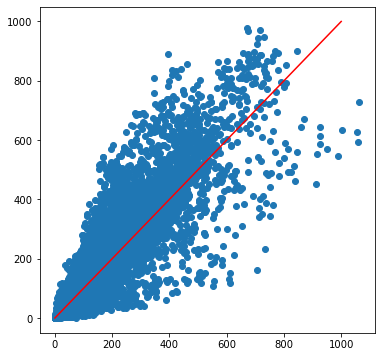

In [49]:
plt.figure(figsize=(6, 6))
plt.scatter(np.exp(y_pred_train)-1, (np.exp(y_train)-1))
plt.plot( [0,1000],[0,1000], color='red')


<AxesSubplot:xlabel='count', ylabel='Density'>

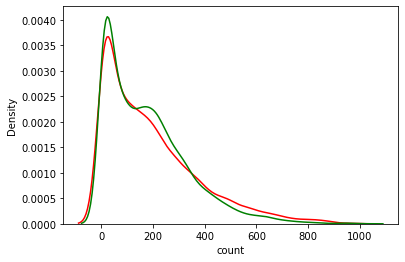

In [2296]:
ax1=sns.distplot((np.exp(y_train)-1), hist=False,color='r',  )
sns.distplot((np.exp(y_pred_train)-1),hist=False,ax=ax1, color='g')

***RandomForestRegressor***

In [161]:
forest_model = RandomForestRegressor(n_estimators=100,max_depth=50)


forest_model.fit(X_train_fe,y_train)
y_pred_train=forest_model.predict(X_train_fe)
y_pred_test=forest_model.predict(X_test_fe)


print ("RMSLE train: ", rmslr((np.exp(y_train)-1), (np.exp(y_pred_train)-1)))
print ("RMSLE test: ", rmslr((np.exp(y_test)-1), (np.exp(y_pred_test)-1)))


print('r_2 score train :',r2_score(y_train,y_pred_train))
print('r_2 score test :',r2_score(y_test,y_pred_test))

RMSLE train:  0.11798826096909346
RMSLE test:  0.31223101923379676
r_2 score train : 0.9930867226620078
r_2 score test : 0.9516803910098831


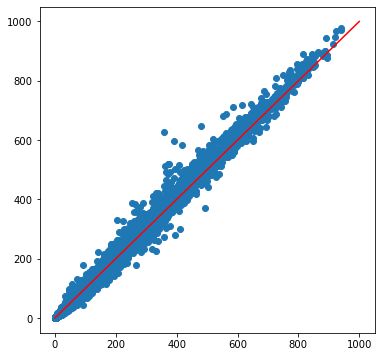

In [162]:
plt.figure(figsize=(6, 6))
plt.scatter(np.exp(y_pred_train)-1, (np.exp(y_train)-1))
plt.plot( [0,1000],[0,1000], color='red')

<AxesSubplot:xlabel='count', ylabel='Density'>

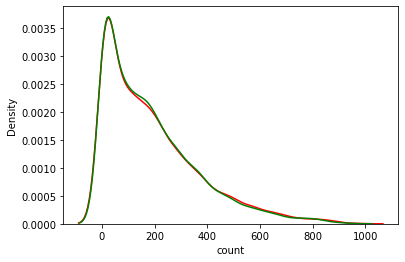

In [163]:
ax1=sns.distplot((np.exp(y_train)-1), hist=False,color='r',  )
sns.distplot((np.exp(y_pred_train)-1),hist=False,ax=ax1, color='g')

***Ridge***

In [164]:
 #'max_iter':[3000]
ridge_model = Ridge()
params = {'alpha': [0.1,0.2,0.3,0.4,0.5,1, 2] }

rmslr_scorer = make_scorer(rmslr, greater_is_better=False)

grid = GridSearchCV(ridge_model,params,scoring = rmslr_scorer)

grid.fit(X_train_fe,y_train)
y_pred_train=grid.predict(X_train_fe)
y_pred_test=grid.predict(X_test_fe)

print (grid.best_params_)
print ("RMSLE train: ", rmslr((np.exp(y_train)-1), (np.exp(y_pred_train)-1)))
print ("RMSLE test: ", rmslr((np.exp(y_test)-1), (np.exp(y_pred_test)-1)))


print('r_2 score train :',r2_score(y_train,y_pred_train))
print('r_2 score test :',r2_score(y_test,y_pred_test))


{'alpha': 0.1}
RMSLE train:  0.5423314326591337
RMSLE test:  0.5332836023331348
r_2 score train : 0.8539384409870745
r_2 score test : 0.8590426333429899


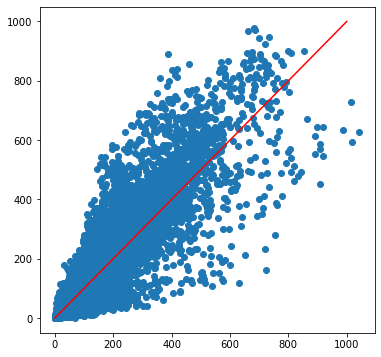

In [165]:
plt.figure(figsize=(6, 6))
plt.scatter(np.exp(y_pred_train)-1, (np.exp(y_train)-1))
plt.plot( [0,1000],[0,1000], color='red')

<AxesSubplot:xlabel='count', ylabel='Density'>

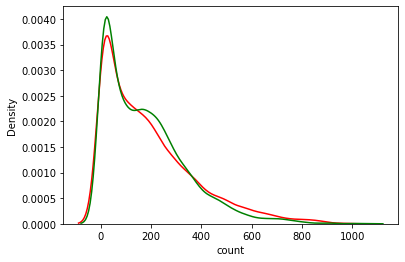

In [166]:
ax1=sns.distplot((np.exp(y_train)-1), hist=False,color='r',  )
sns.distplot((np.exp(y_pred_train)-1),hist=False,ax=ax1, color='g')

***Lasso***

In [171]:

lasso_m_ = Lasso()
alpha=[0.0005,0.0006,0.06,0.5,0.0001,0.01,1,2,3,4,4.4,4]

lasso_params_ = { 'max_iter':[3000],'alpha':alpha}

rmslr_scorer = make_scorer(rmslr, greater_is_better=False)

grid_lasso = GridSearchCV( lasso_m_,lasso_params_,scoring = rmslr_scorer,cv=5)

grid_lasso.fit(X_train_fe,y_train)
y_pred_train=grid_lasso.predict(X_train_fe)
y_pred_test=grid_lasso.predict(X_test_fe)

print (grid_lasso.best_params_)
print ("RMSLE train: ", rmslr((np.exp(y_train)-1), (np.exp(y_pred_train)-1)))
print ("RMSLE test: ", rmslr((np.exp(y_test)-1), (np.exp(y_pred_test)-1)))


print('r_2 score train :',r2_score(y_train,y_pred_train))
print('r_2 score test :',r2_score(y_test,y_pred_test))


{'alpha': 0.0001, 'max_iter': 3000}
RMSLE train:  0.5436009511956927
RMSLE test:  0.5332978658258036
r_2 score train : 0.8532538231493187
r_2 score test : 0.8590350929976852


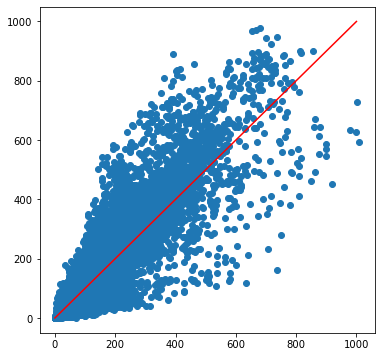

In [172]:
plt.figure(figsize=(6, 6))
plt.scatter(np.exp(y_pred_train)-1, (np.exp(y_train)-1))
plt.plot( [0,1000],[0,1000], color='red')

<AxesSubplot:xlabel='count', ylabel='Density'>

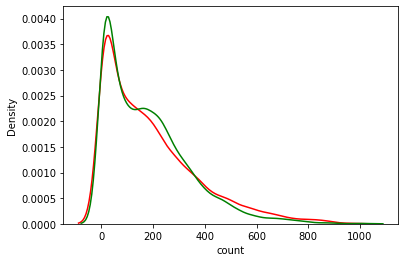

In [173]:
ax1=sns.distplot((np.exp(y_train)-1), hist=False,color='r',  )
sns.distplot((np.exp(y_pred_train)-1),hist=False,ax=ax1, color='g')